In this short Notebook, we will see how to perform hyperparameter gridsearch. It is a method which helps us to find the set of parameters for our models which give us the best performance. It spares us the pain of manually trying and testing different parameter combinations.


In [30]:
from sklearn.model_selection import train_test_split, GridSearchCV
import pandas as pd
import numpy as np
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import fetch_california_housing


We will be using the california housing dataset for this notebook. This dataset comes as one of sklearns packaged datasets. It can also be found online and on several other machine learning libraries. However, sklearn has filtered this dataset keeping only the numeric attributes. Below we can see the names of the attributes retained. If you want to read more about this dataset please have a look [here](https://inria.github.io/scikit-learn-mooc/python_scripts/datasets_california_housing.html).

In [31]:
california_housing = fetch_california_housing()
predictors = california_housing.data
target = california_housing.target
california_housing.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

Let us visualise these attributes/variables on plots

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


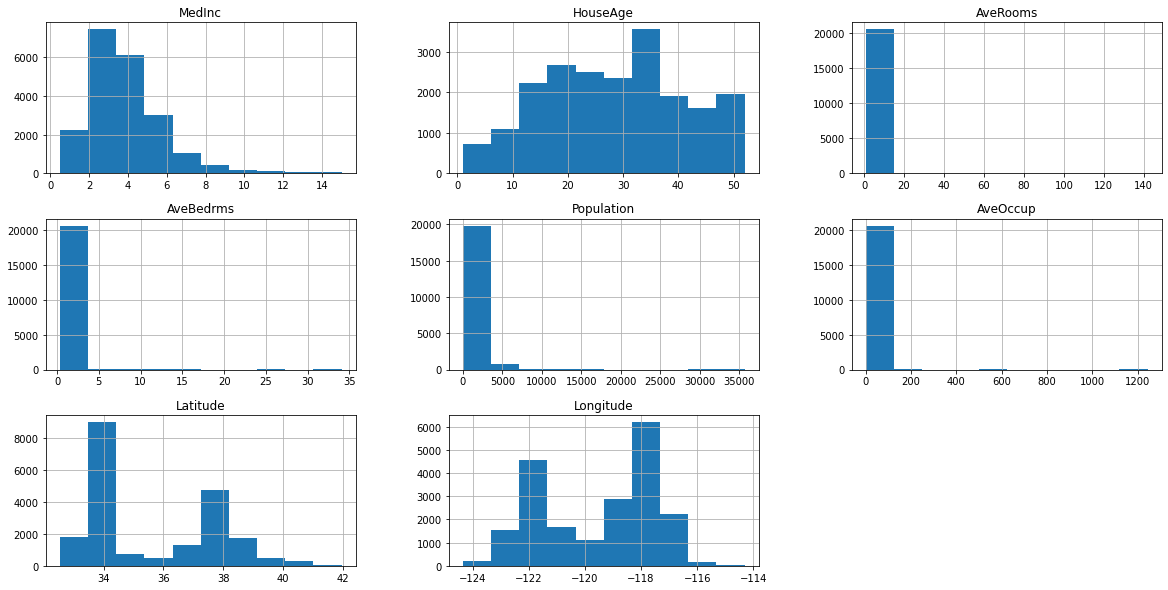

In [32]:
data = pd.DataFrame(predictors, columns=california_housing.feature_names)
data.hist(figsize=(20, 10))
data.head()

In [33]:
x_train, x_test, y_train, y_test = train_test_split(predictors, target, test_size=0.2)

We start by using building a Lasso regression model. Lasso regression has one main hyperparameter which is alpha. It controls how strong or weak our attributes will be regularised.

In [34]:
scaler = StandardScaler().fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)
lasso_reg = Lasso(alpha=0.5)
lasso_reg.fit(x_train, y_train)
manual_score = lasso_reg.score(x_test, y_test)

**GridSearch**

---



Now we do hyperparameter optimization using sklearns Gridsearch method. The first problem with Gridsearch is you have to define the parameter space to search yourself. 

In [35]:
param = {'alpha': np.linspace(0.1, 10, 100)}
grid_search = GridSearchCV(Lasso(), param_grid=param, scoring='r2', cv=5)
grid_search.fit(x_train, y_train)
best_model = grid_search.best_estimator_
grid_score = best_model.score(x_test, y_test)

In [36]:
print('Manual score= ', norm_score, 'manual alpha= ', 0.5 )
print('Gridsearch score=', grid_score, 'best parameters', grid_search.best_params_)

Manual score=  0.2827221523265081 manual alpha=  0.5
Gridsearch score= 0.5055403725259464 best parameters {'alpha': 0.1}


If you expand the lower bound for alpha above to 0.01, you should see an improvement in the regression score. Try it out for yourself!!!

**cheers!!!**